# Number density evolution

In [1]:
import numpy as np
import os 
import sys
sys.path.append(os.getenv("EPOCH_SIMS_HOME"))
from plot_helper import animate_field
from configs.config import *
%config InlineBackend.figure_format = 'retina'

In [2]:
# load grid data
grid = np.load(os.path.join(raw_data_folder, 'grid.npy'), allow_pickle=True)
x_array, y_array, z_array = grid

## Proton

In [3]:
proton_density = np.load(
    os.path.join(raw_data_folder, "Proton_Derived_Number_Density_XY.npy"),
    allow_pickle=True,
)

### Linear scale

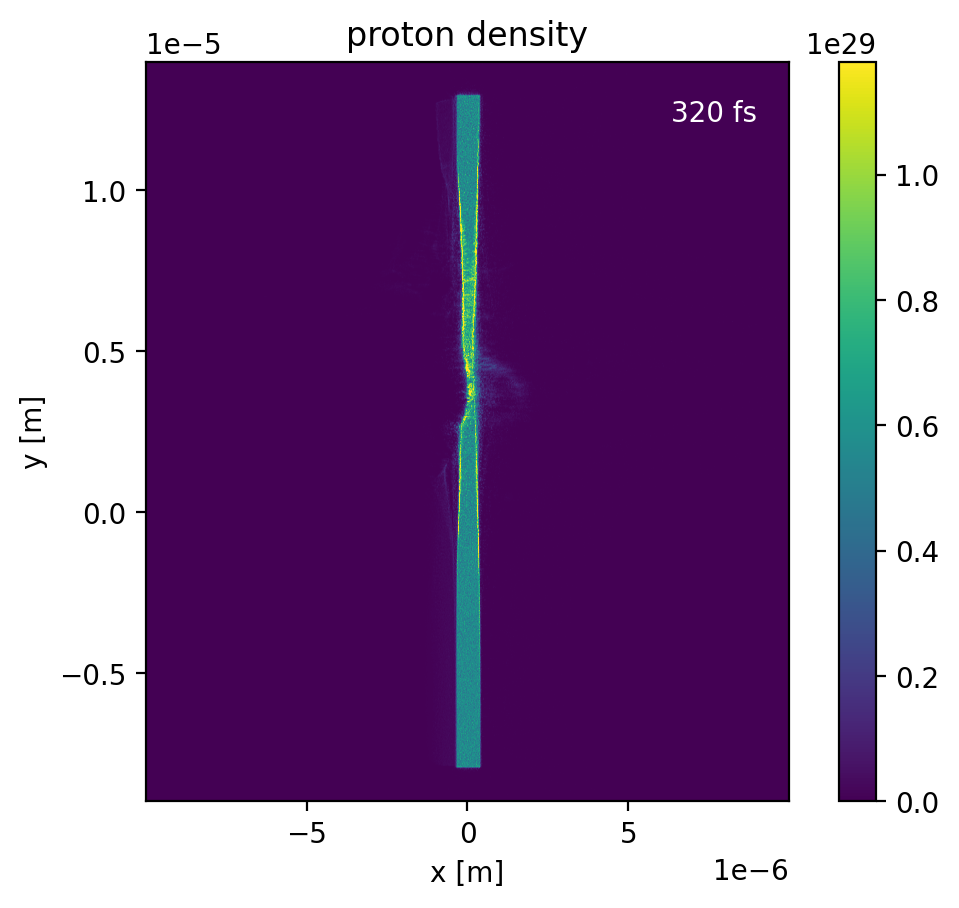

In [4]:
# call animate_density and save animation
extent = [x_array[0], x_array[-1], y_array[0], y_array[-1]]
ani, ax = animate_field(proton_density, extent)

# set axes label
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title(f"proton density")
ani.save(os.path.join(media_folder, "proton_density_xy_modified.gif"), fps=10, dpi=300)

### Log scale

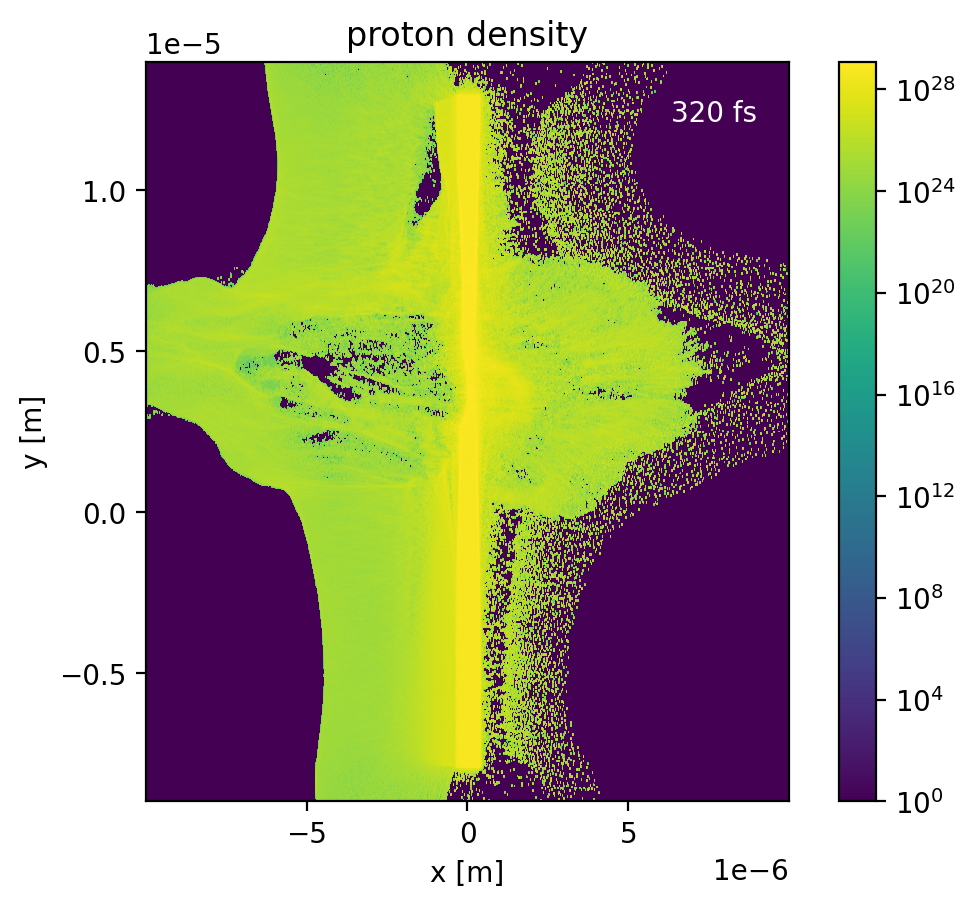

In [5]:
species = 'proton'
ani, ax = animate_field(proton_density + 1, extent, log_scale=True)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'{species} density')
ani.save(os.path.join(media_folder, f'{species}_density_log_xy.gif'), fps=10, dpi=300)

## Electron

In [6]:
electron_density = np.load(
    os.path.join(raw_data_folder, "Electron_Derived_Number_Density_XY.npy"),
    allow_pickle=True,
)

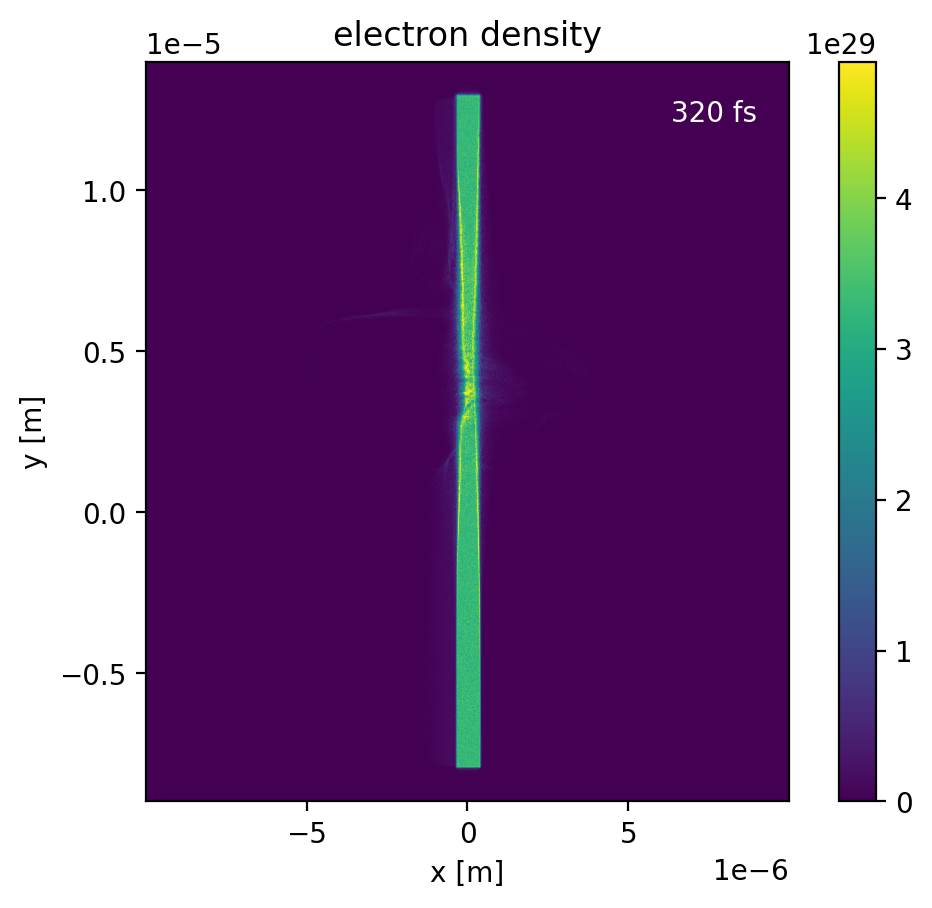

In [7]:
species = 'electron'
ani, ax = animate_field(electron_density, extent)

# set axes label
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title(f'{species} density')
ani.save(os.path.join(media_folder, f'{species}_density_xy.gif'), fps=10, dpi=300)

## Carbon 

In [8]:
carbon_density = np.load(
    os.path.join(raw_data_folder, "Carbon_Derived_Number_Density_XY.npy"),
    allow_pickle=True,
)

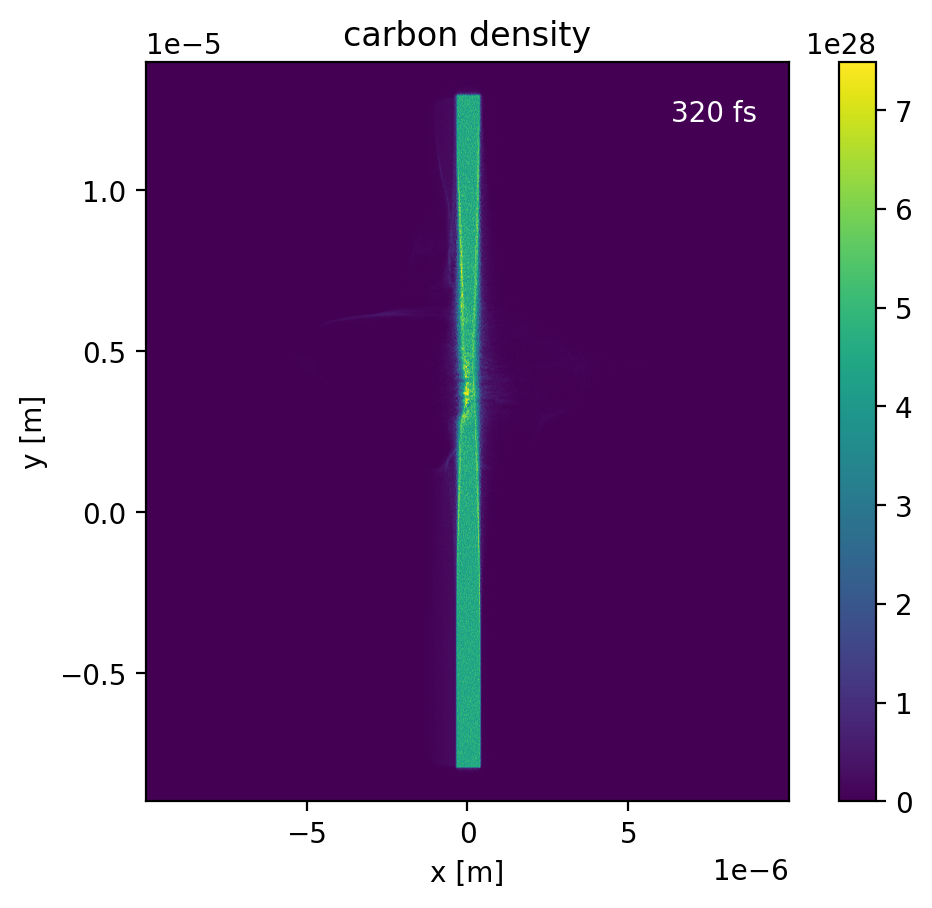

In [9]:
species = "carbon"
ani, ax = animate_field(carbon_density, extent)

# set axes label
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title(f"{species} density")
ani.save(os.path.join(media_folder, f"{species}_density_xy.gif"), fps=10, dpi=300)

## All Together

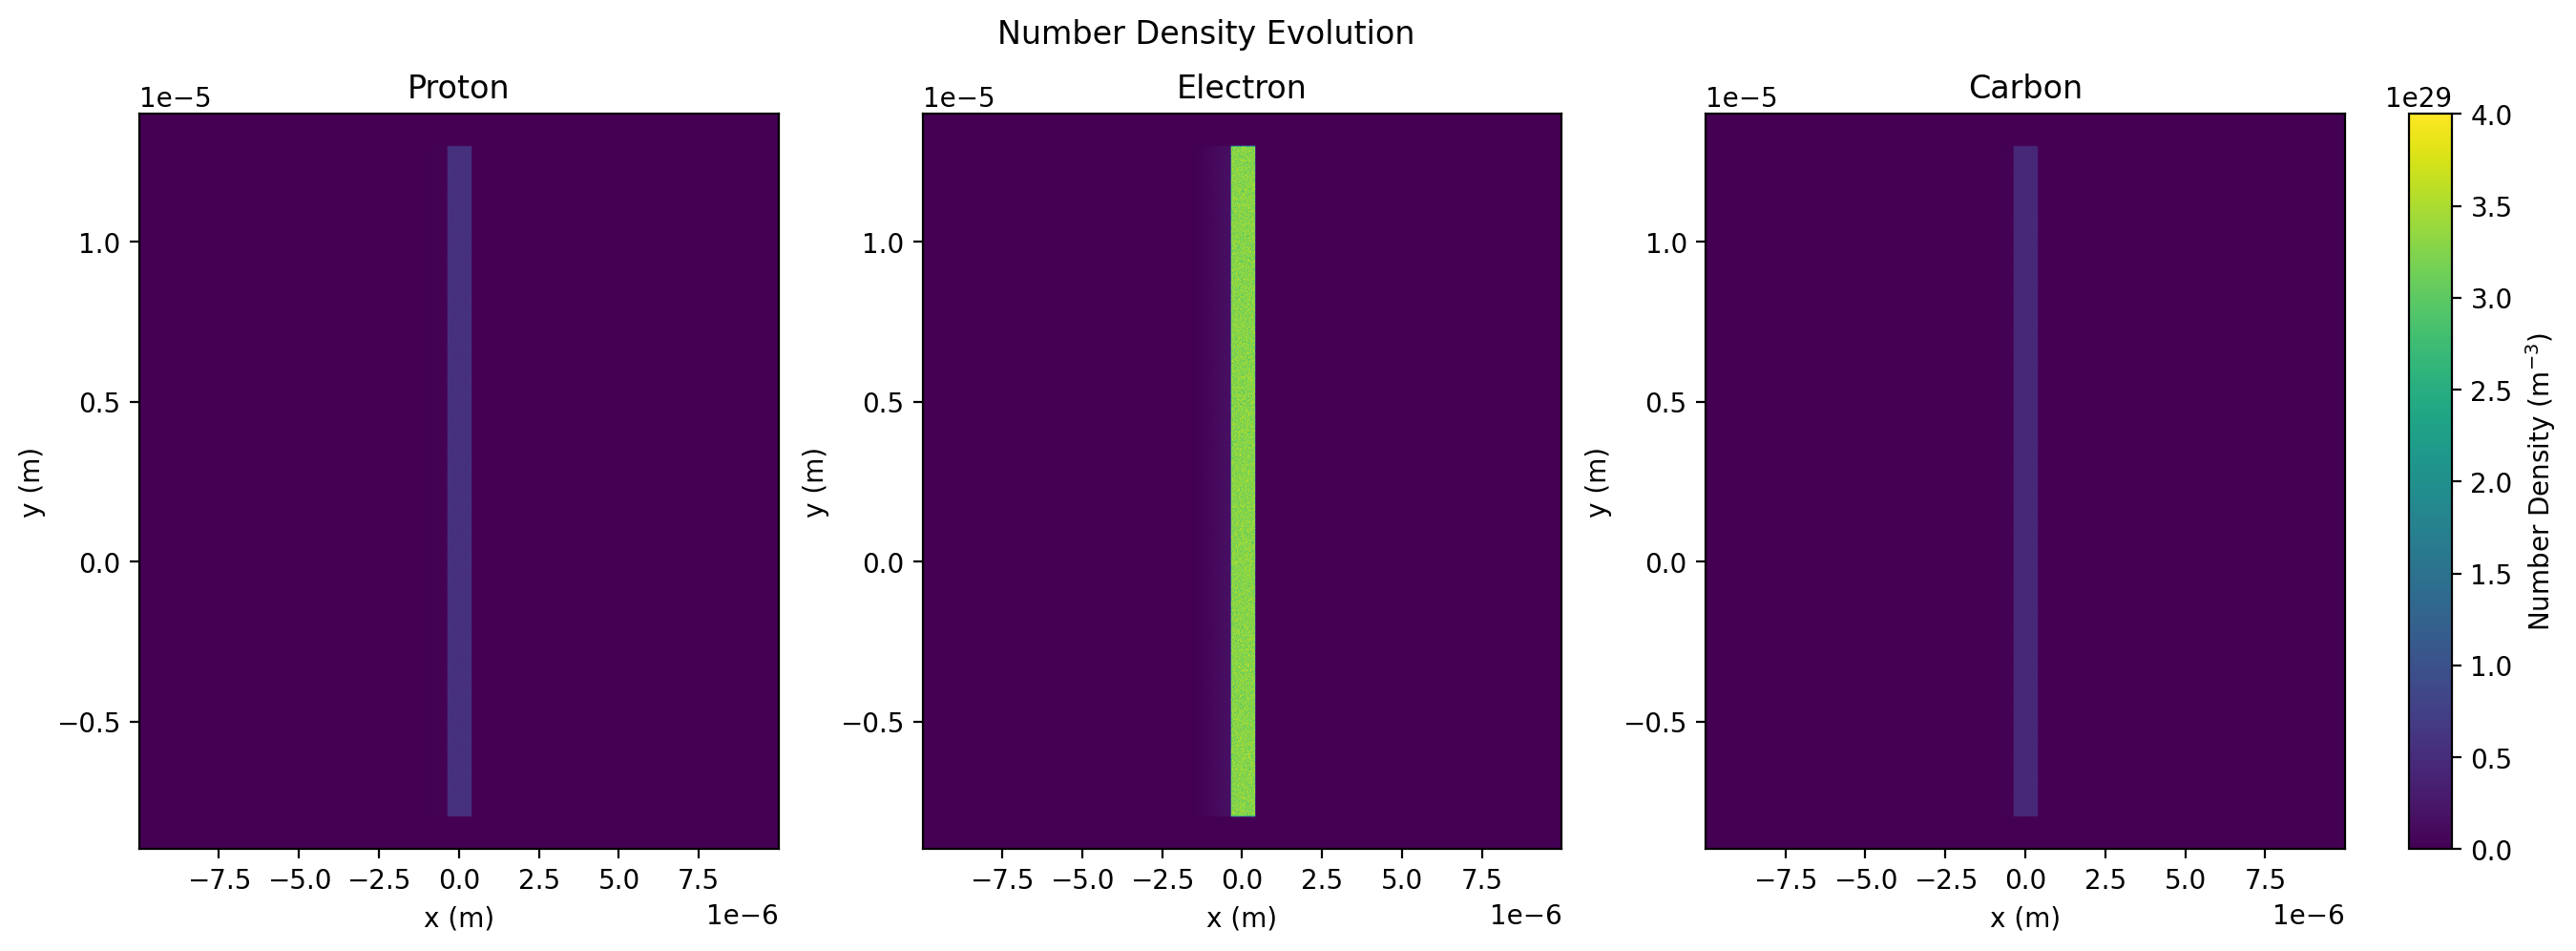

In [10]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

# Create the initial figure with three subplots and colorbars
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
cbar_ax = fig.add_axes([.92, 0.11, 0.015, 0.77])

densities = [proton_density, electron_density, carbon_density]
titles = ['Proton', 'Electron', 'Carbon']
images = []

vmin = 0
vmax = 4e29

for ax, density, title in zip(axs, densities, titles):
    img = ax.imshow(density[0, :, :].T, origin='lower', extent=[x_array[0], x_array[-1], y_array[0], y_array[-1]], interpolation='nearest', vmin=vmin, vmax=vmax)
    images.append(img)
    ax.set_title(title)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')

fig.colorbar(images[0], cax=cbar_ax, label=r'Number Density (m$^{-3}$)')
fig.suptitle('Number Density Evolution')

# Define an update function for the animation
def update(i):
    for img, density in zip(images, densities):
        img.set_array(density[i, :, :].T)

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(proton_density.shape[0]), blit=False)

plt.show()


In [11]:
# save animation
ani.save(os.path.join(media_folder, 'density_xy.gif'), fps=10, dpi=300)